In [2]:
import pandas as pd
import numpy as np

# open df from csv
position_366096 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_366096_LVR_17285193_17673993.csv')
position_453456 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_453456_LVR_17285193_17673993.csv')
position_506262 = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_506262_LVR_17285193_17673993.csv')
range = pd.read_csv('LQTYETH/LVR/Range_LQTYETH_LVR_17285193_17673993.csv')
# in range df if upper_price and lower_price are same, set both to NA
range.loc[range['upper_price'] == range['lower_price'], ['upper_price', 'lower_price']] = 0

In [3]:
# combine range, position_250274, position_515539, position_520645 on date
df = pd.merge(range, position_366096, on='date', how='left', suffixes=('', '_366096'))
df = pd.merge(df, position_453456, on='date', how='left', suffixes=('', '_453456'))
df = pd.merge(df, position_506262, on='date', how='left', suffixes=('', '_506262'))
combined_df = df

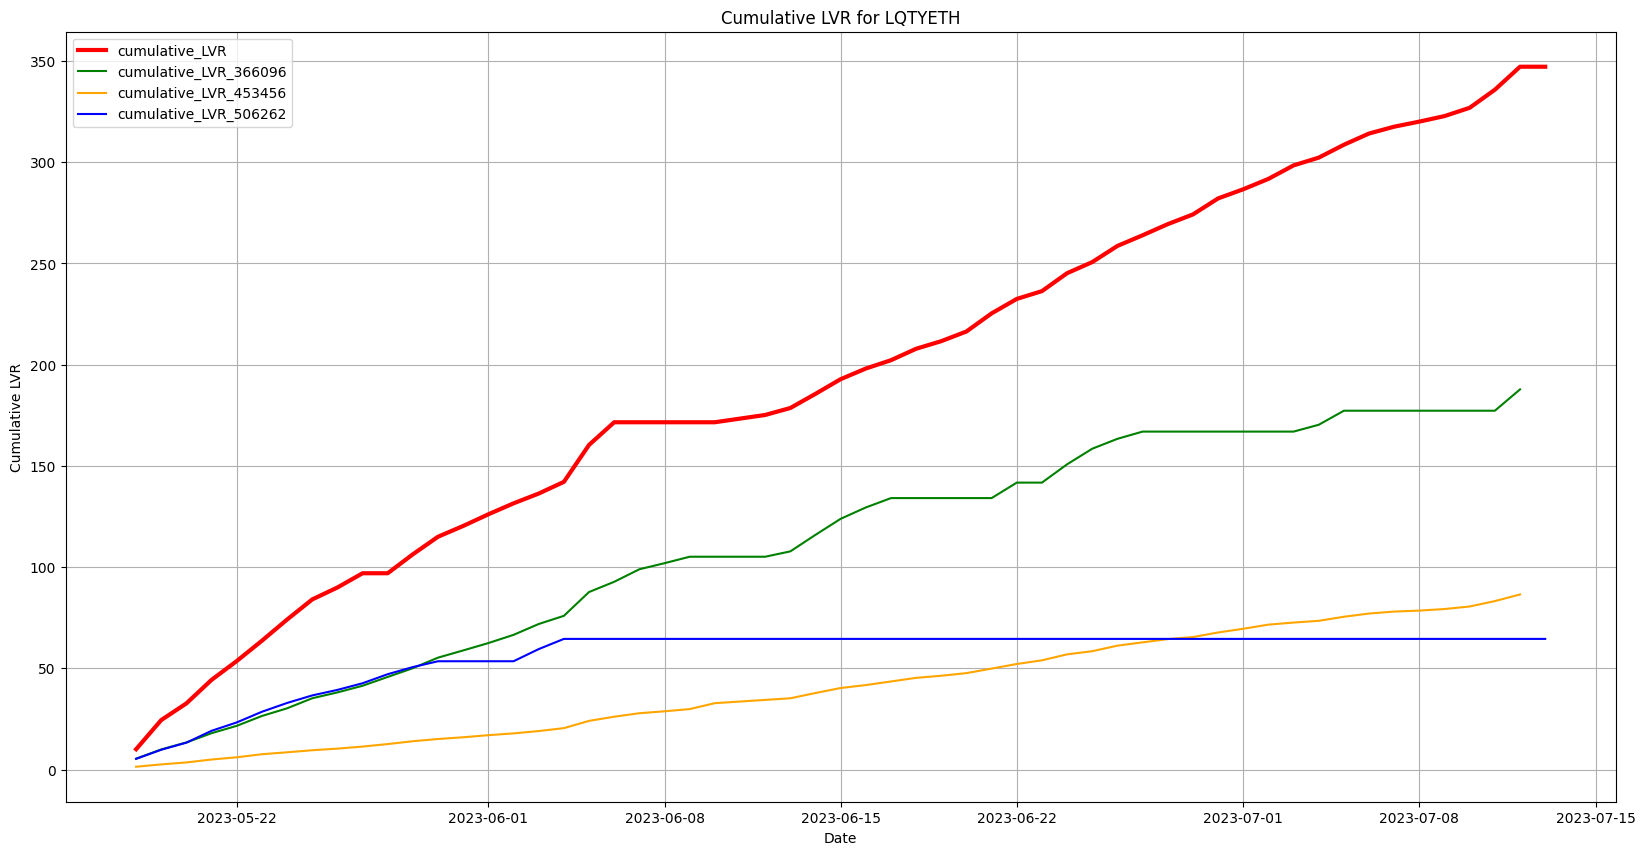

In [10]:
# create new columns for cumulative LVR
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_366096'] = combined_df['daily_LVR_ratio_366096'].cumsum()
combined_df['cumulative_LVR_453456'] = combined_df['daily_LVR_ratio_453456'].cumsum()
combined_df['cumulative_LVR_506262'] = combined_df['daily_LVR_ratio_506262'].cumsum()

# plot date vs cumulative LVR, cumulative LVR_250274, cumulative LVR_515539, cumulative LVR_520645

import matplotlib.pyplot as plt

combined_df['date'] = pd.to_datetime(combined_df['date'])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(combined_df['date'], combined_df['cumulative_LVR'], label='cumulative_LVR', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['cumulative_LVR_366096'], label='cumulative_LVR_366096', color='green')
ax.plot(combined_df['date'], combined_df['cumulative_LVR_453456'], label='cumulative_LVR_453456', color='orange')
ax.plot(combined_df['date'], combined_df['cumulative_LVR_506262'], label='cumulative_LVR_506262', color='blue')
ax.set_xlabel('Date')
ax.grid(True)
ax.set_ylabel('Cumulative LVR')
ax.set_title('Cumulative LVR for LQTYETH')
ax.legend()

plt.show()

In [16]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_366096'] = combined_df['daily_LVR_ratio_366096'].cumsum()
combined_df['cumulative_LVR_453456'] = combined_df['daily_LVR_ratio_453456'].cumsum()
combined_df['cumulative_LVR_506262'] = combined_df['daily_LVR_ratio_506262'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD'],
                         mode='lines', name='cumulative_LVR', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_366096'],
                         mode='lines', name='cumulative_LVR_366096', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_453456'],
                         mode='lines', name='cumulative_LVR_453456', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_506262'],
                         mode='lines', name='cumulative_LVR_506262', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR for LQTYCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


In [15]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_366096'] = combined_df['daily_LVR_ratio_366096'].cumsum()
combined_df['cumulative_LVR_453456'] = combined_df['daily_LVR_ratio_453456'].cumsum()
combined_df['cumulative_LVR_506262'] = combined_df['daily_LVR_ratio_506262'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR'],
                         mode='lines', name='cumulative_LVR', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_366096'],
                         mode='lines', name='cumulative_LVR_366096', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_453456'],
                         mode='lines', name='cumulative_LVR_453456', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_506262'],
                         mode='lines', name='cumulative_LVR_506262', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR for LQTYCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


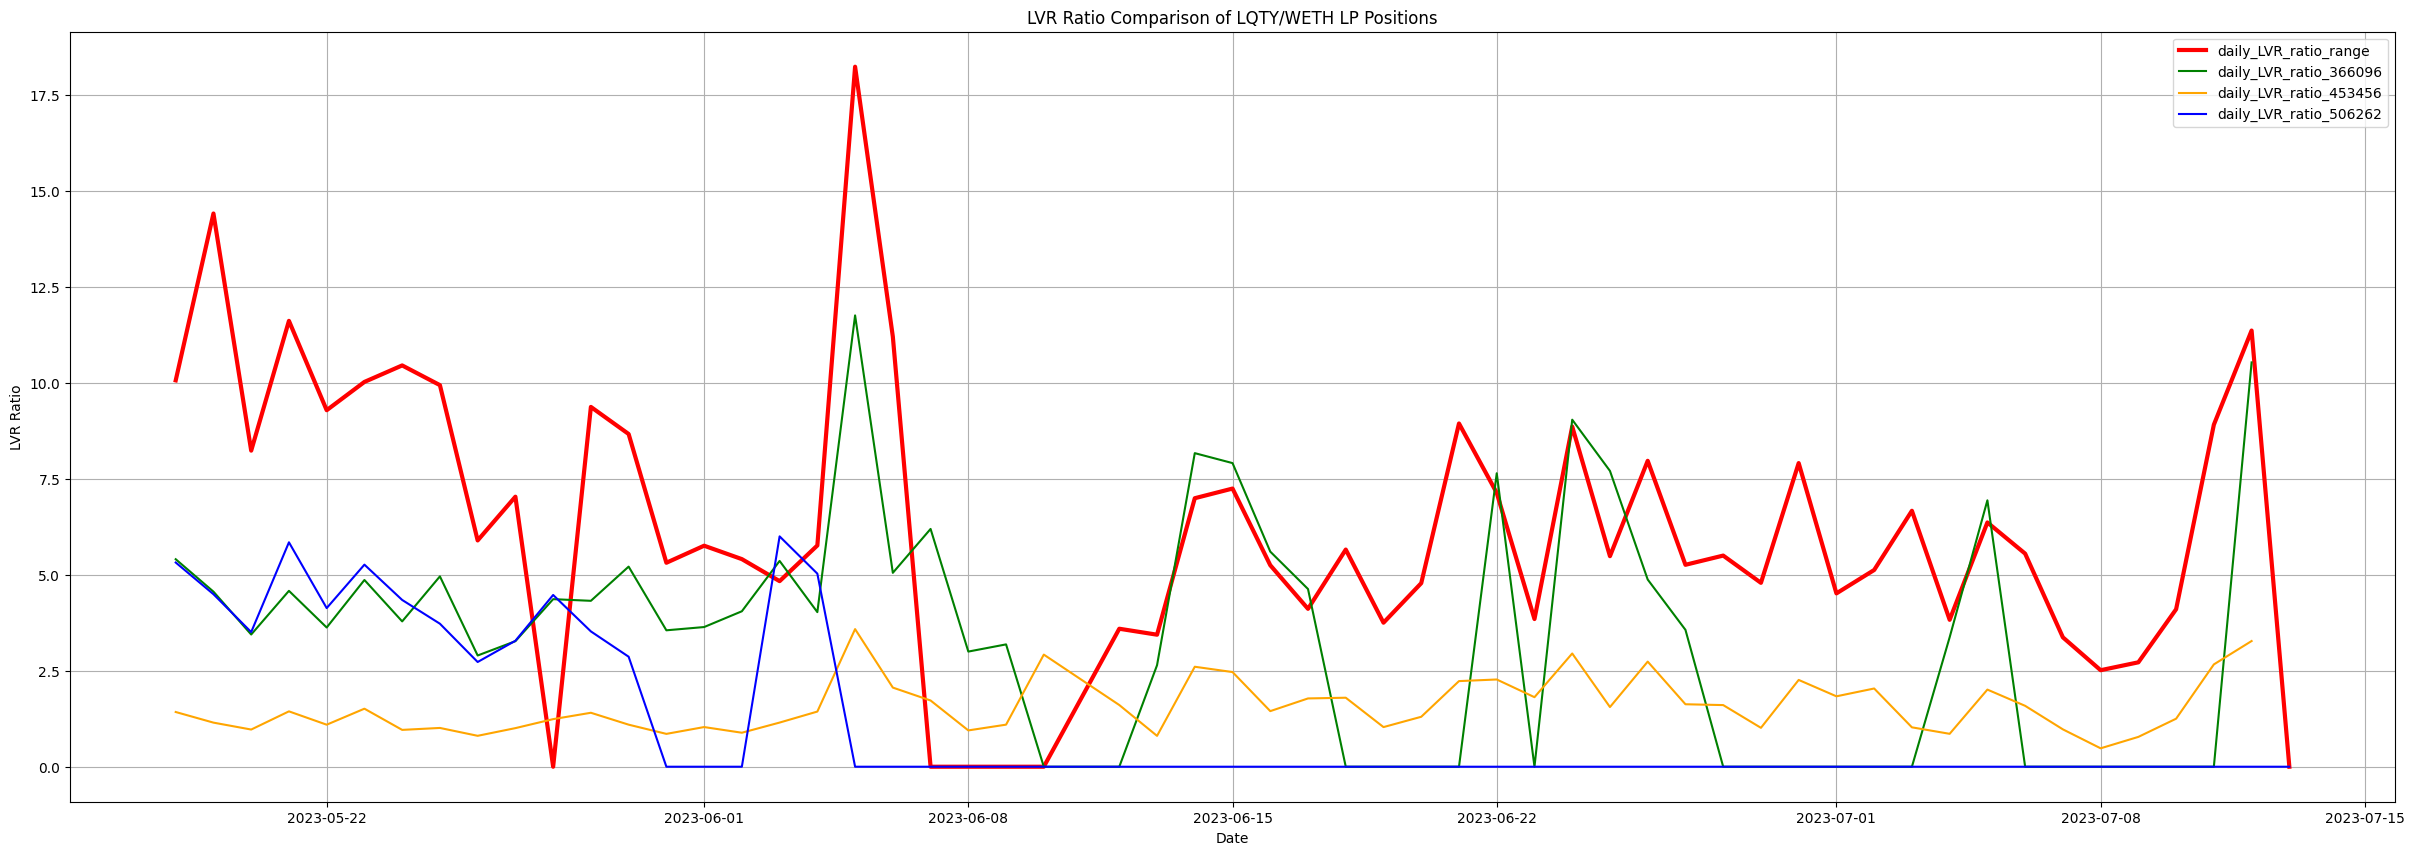

In [5]:
# plot date vs daily_LVR_ratio_range, daily_LVR_ratio_366096, daily_LVR_ratio_453456, daily_LVR_ratio_506262

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['daily_LVR_ratio'], label='daily_LVR_ratio_range', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_366096'], label='daily_LVR_ratio_366096', color='green')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_453456'], label='daily_LVR_ratio_453456', color='orange')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_506262'], label='daily_LVR_ratio_506262', color='blue')

ax.set(xlabel='Date', ylabel='LVR Ratio', title='LVR Ratio Comparison of LQTY/WETH LP Positions')
ax.grid(True)
ax.legend()

plt.show()

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create interactive figure
fig = go.Figure()

# Add traces for each daily LVR ratio
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio'],
                         mode='lines', name='daily_LVR_ratio_range', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_366096'],
                         mode='lines', name='daily_LVR_ratio_366096', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_453456'],
                         mode='lines', name='daily_LVR_ratio_453456', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_506262'],
                         mode='lines', name='daily_LVR_ratio_506262', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='LVR Ratio Comparison of LQTY/WETH LP Positions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='LVR Ratio'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


In [6]:
position_366096.head()

,open_time,log_return,block,current_tick,upper_price,lower_price,current_price,amount0,amount1,timestamp,date,pool_value,token0_usd,token1_usd,daily_LVR_ratio,in_range,daily_LVR,cumulative_LVR,cumulative_LVR_USD,daily_LVR_USD
0,2023-05-18,5.086961,17285193,-72095,0.000832,0.0005,0.000740,537.473473,1.241787,1684397831000,2023-05-18,1.639407,1.34,1826.78,5.406141,True,0.000886,0.000886,1.619050,1.619050
1,2023-05-19,4.307170,17292393,-72238,0.000832,0.0005,0.000729,605.066667,1.192139,1684485419000,2023-05-19,1.633408,1.32,1807.44,4.561503,True,0.000745,0.001631,2.948596,1.346686
2,2023-05-20,3.255954,17299593,-72286,0.000832,0.0005,0.000726,627.863840,1.175553,1684573031000,2023-05-20,1.631255,1.31,1814.58,3.444489,True,0.000562,0.002193,3.979827,1.019584
3,2023-05-21,4.342572,17306793,-72408,0.000832,0.0005,0.000717,686.053500,1.133576,1684660523000,2023-05-21,1.625474,1.30,1815.23,4.582329,True,0.000745,0.002938,5.333319,1.352066
4,2023-05-22,3.443757,17313993,-72503,0.000832,0.0005,0.000710,731.611564,1.101065,1684748255000,2023-05-22,1.620670,1.29,1816.38,3.627392,True,0.000588,0.003526,6.404513,1.067814


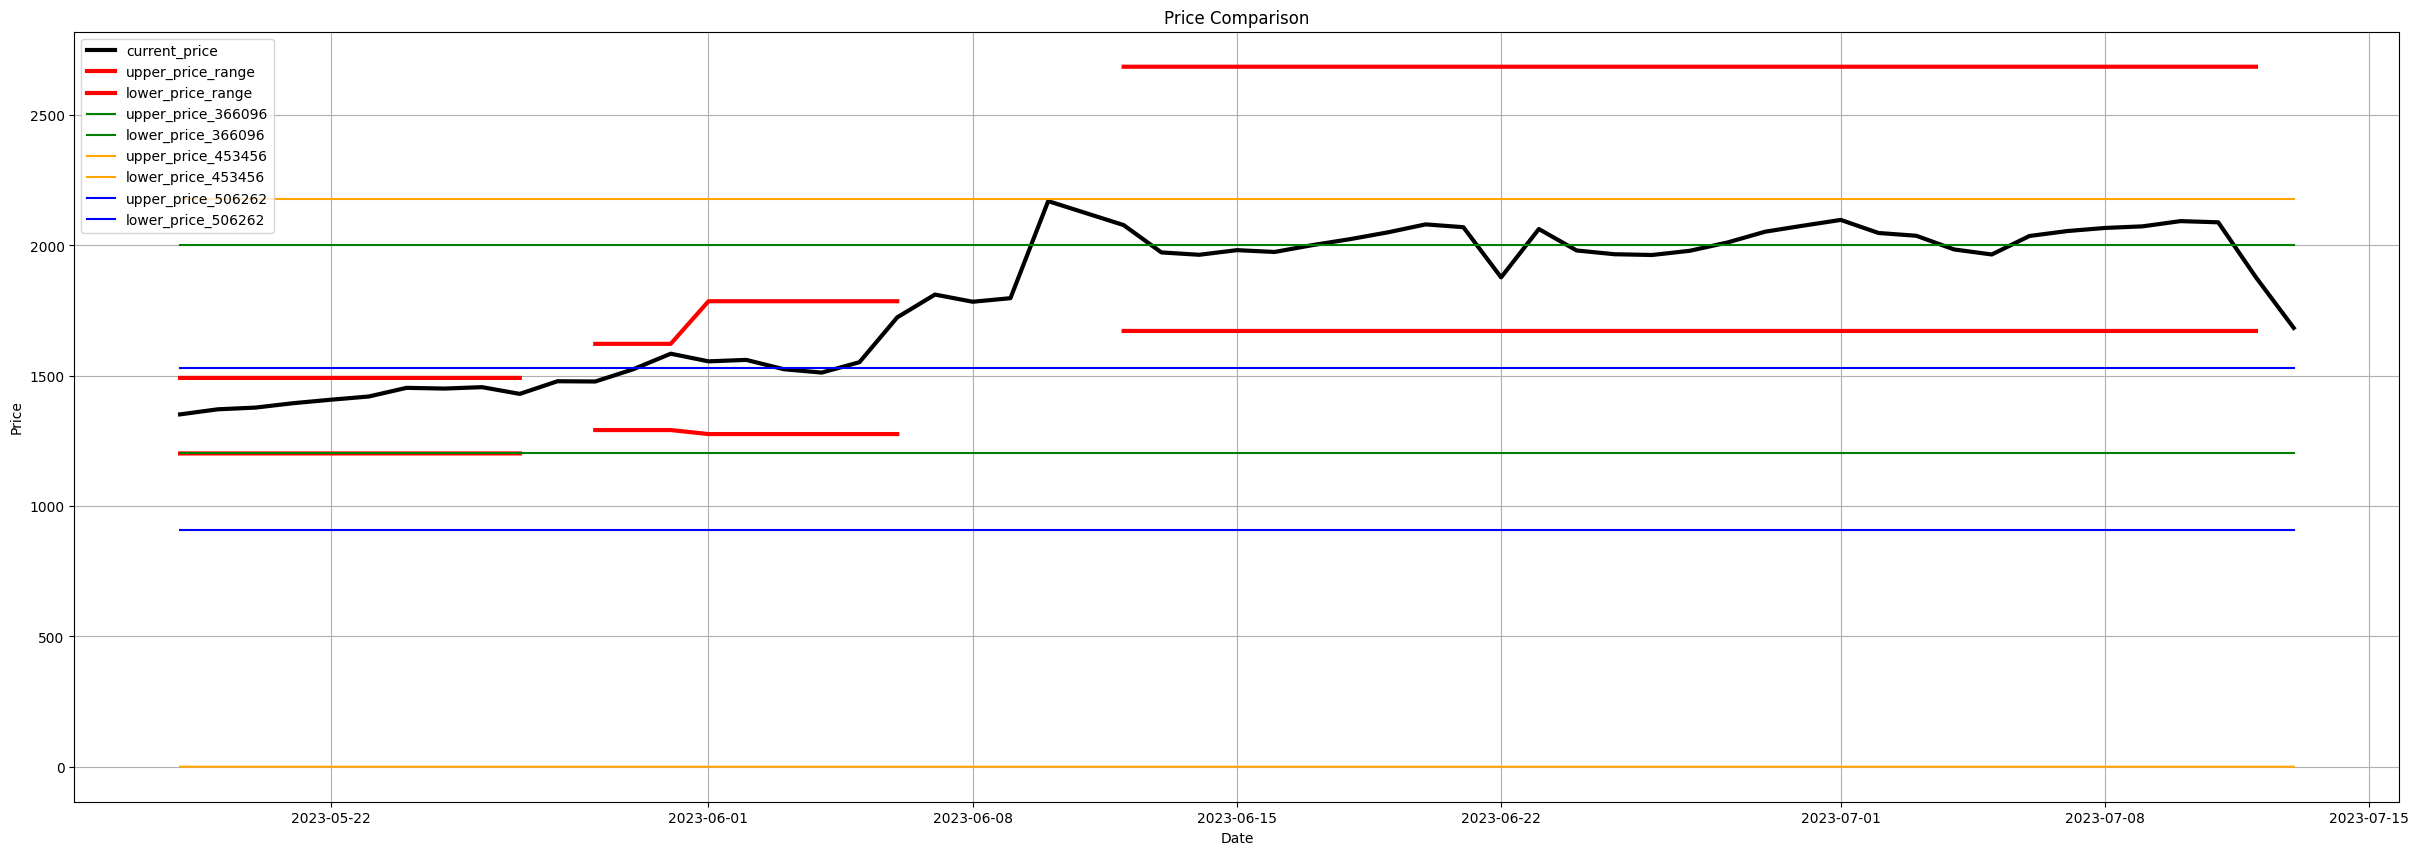

In [7]:
# plot date vs upper_price_range, lower_price_range, upper_price_366096, lower_price_366096, upper_price_453456, lower_price_453456, upper_price_506262, lower_price_506262

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], 1/combined_df['current_price'], label='current_price',color='black', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['upper_price'], label='upper_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['lower_price'], label='lower_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], 1/combined_df['upper_price_366096'], label='upper_price_366096',color='green')
ax.plot(combined_df['date'], 1/combined_df['lower_price_366096'], label='lower_price_366096',color='green')
ax.plot(combined_df['date'], combined_df['upper_price'], label='upper_price_453456',color='orange')
ax.plot(combined_df['date'], 1/combined_df['lower_price_453456'], label='lower_price_453456',color='orange')
ax.plot(combined_df['date'], 1/combined_df['upper_price_506262'], label='upper_price_506262',color='blue')
ax.plot(combined_df['date'], 1/combined_df['lower_price_506262'], label='lower_price_506262',color='blue')

ax.set(xlabel='Date', ylabel='Price', title='Price Comparison')
ax.grid(True)
ax.legend()

plt.show()

In [8]:
position_453456

,open_time,log_return,block,current_tick,upper_price,lower_price,current_price,amount0,amount1,timestamp,date,pool_value,token0_usd,token1_usd,daily_LVR_ratio,in_range,daily_LVR,cumulative_LVR,cumulative_LVR_USD,daily_LVR_USD
0,2023-05-18,4.877128,17285193,-72095,0.005813,0.000459,0.000740,395197.324398,96.350704,1684397831000,2023-05-18,388.715091,1.340000,1826.78,1.425682,True,0.055418,0.055418,101.237241,101.237241
1,2023-05-19,3.916129,17292393,-72238,0.005813,0.000459,0.000729,399605.685596,93.112661,1684485419000,2023-05-19,384.541169,1.320000,1807.44,1.148944,True,0.044182,0.099600,180.021114,79.855665
2,2023-05-20,3.297447,17299593,-72286,0.005813,0.000459,0.000726,401092.494670,92.030945,1684573031000,2023-05-20,383.143141,1.310000,1814.58,0.968633,True,0.037113,0.136713,248.075895,67.343637
3,2023-05-21,4.894800,17306793,-72408,0.005813,0.000459,0.000717,404887.566710,89.293239,1684660523000,2023-05-21,379.596676,1.300000,1815.23,1.442468,True,0.054756,0.191468,347.558745,99.393986
4,2023-05-22,3.705994,17313993,-72503,0.005813,0.000459,0.000710,407858.818550,87.172953,1684748255000,2023-05-22,376.841942,1.290000,1816.38,1.094904,True,0.041261,0.232729,422.723844,74.944910
5,2023-05-23,5.105824,17321193,-72590,0.005813,0.000459,0.000704,410592.267619,85.240033,1684835843000,2023-05-23,374.324488,1.300000,1855.78,1.512026,True,0.056599,0.289328,536.928340,105.034984
6,2023-05-24,3.220384,17328393,-72821,0.005813,0.000459,0.000688,417908.007469,80.148408,1684923383000,2023-05-24,367.665035,1.250000,1816.98,0.959801,True,0.035289,0.324616,589.820968,64.118538
7,2023-05-25,3.391989,17335593,-72802,0.005813,0.000459,0.000689,417303.085827,80.564984,1685010815000,2023-05-25,368.211412,1.240000,1786.51,1.010405,True,0.037204,0.361820,646.395718,66.465803
8,2023-05-26,2.700979,17342793,-72839,0.005813,0.000459,0.000687,418481.621450,79.754122,1685098235000,2023-05-26,367.147641,1.250000,1812.00,0.805407,True,0.029570,0.391391,709.199957,53.581438
9,2023-05-27,3.389347,17349993,-72660,0.005813,0.000459,0.000699,412800.242730,83.690901,1685185691000,2023-05-27,372.302651,1.280000,1825.56,1.005638,True,0.037440,0.428831,782.856474,68.349259
